<a href="https://colab.research.google.com/github/Augusta02/GoMyCode-Projects/blob/main/Copy_of_Copy_of_Electoral_Analysis_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data from Electoral Analysis/Pres1 - Pres (1).csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df1.head()

,Unnamed: 0,State,Year,APC,PDP,Others,Latitude,Longitude
0,NaN,Abia,2015,0.030000,0.940000,0.020000,5.532003,7.486002
1,NaN,Adamawa,2015,0.590000,0.400000,0.020000,10.270341,13.270032
2,NaN,Akwa Ibom,2015,0.060000,0.940000,0.010000,5.007996,7.849999
3,NaN,Anambra,2015,0.030000,0.960000,0.010000,6.210434,7.069997
4,NaN,Bauchi,2015,0.910000,0.080000,0.000000,11.680410,10.190013


In [ ]:
df = df1.drop('Unnamed: 0', axis=1)

In [ ]:
# df.isnull().sum()

In [ ]:
# df.describe()

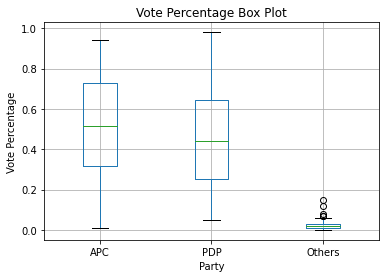

In [ ]:
columns= ['APC', 'PDP', 'Others']

df[columns].boxplot()
plt.title('Vote Percentage Box Plot')
plt.xlabel('Party')
plt.ylabel('Vote Percentage')

# Display the plot
plt.show()

In [ ]:
# custom function to determine the winning party
def winning_party(row):
  if row['APC'] > row['PDP'] > row['Others']:
    return 'APC'
  if row['PDP'] > row['APC'] > row['Others']:
    return 'PDP'
  else:
    return 'Others'

df['Winner'] = df.apply(winning_party, axis=1)
print(df)
  

        State  Year      APC      PDP   Others  Latitude  Longitude Winner
0        Abia  2015 0.030000 0.940000 0.020000  5.532003   7.486002    PDP
1     Adamawa  2015 0.590000 0.400000 0.020000 10.270341  13.270032    APC
2   Akwa Ibom  2015 0.060000 0.940000 0.010000  5.007996   7.849999    PDP
3     Anambra  2015 0.030000 0.960000 0.010000  6.210434   7.069997    PDP
4      Bauchi  2015 0.910000 0.080000 0.000000 11.680410  10.190013    APC
..        ...   ...      ...      ...      ...       ...        ...    ...
69     Rivers  2019 0.230000 0.740000 0.030000  4.810002   7.010001    PDP
70     Sokoto  2019 0.560000 0.410000 0.020000 13.060015   5.240031    APC
71     Taraba  2019 0.460000 0.530000 0.010000  7.870410   9.780013    PDP
72       Yobe  2019 0.890000 0.090000 0.020000 11.748996  11.966005    APC
73    Zamfara  2019 0.760000 0.220000 0.020000 12.170406   6.659996    APC

[74 rows x 8 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl

pd.set_option('float_format', '{:f}'.format)

In [ ]:
party_dict = {'APC': 0, 'PDP': 1, 'Others': 2}

# Map the party names to integers in the dataframe
df['Winner'] = df['Winner'].map(party_dict)
df.head(20)

,State,Year,APC,PDP,Others,Latitude,Longitude,Winner
0,Abia,2015,0.030000,0.940000,0.020000,5.532003,7.486002,1
1,Adamawa,2015,0.590000,0.400000,0.020000,10.270341,13.270032,0
2,Akwa Ibom,2015,0.060000,0.940000,0.010000,5.007996,7.849999,1
3,Anambra,2015,0.030000,0.960000,0.010000,6.210434,7.069997,1
4,Bauchi,2015,0.910000,0.080000,0.000000,11.680410,10.190013,0
5,Benue,2015,0.550000,0.440000,0.010000,7.190400,8.129984,0
6,Borno,2015,0.940000,0.050000,0.010000,10.620423,12.189995,0
7,Bayelsa,2015,0.010000,0.980000,0.000000,4.664030,6.036987,1
8,Cross River,2015,0.060000,0.920000,0.020000,4.960407,8.330024,1
9,Delta,2015,0.040000,0.960000,0.010000,5.890427,5.680004,1


In [ ]:
X = df[['APC', 'PDP', 'Others']]
y = df[['Winner']].values.ravel()
# y = y.ravel()
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(X, y)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
y_pred = log_reg.predict(X)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y, y_pred)))


Accuracy: 0.91
Error rate: 0.09


In [ ]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, X, y, cv=5)
scores


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([1.        , 0.86666667, 0.8       , 0.86666667, 1.        ])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.16)


In [ ]:
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)


[[40  0  0]
 [ 4 27  0]
 [ 1  2  0]]


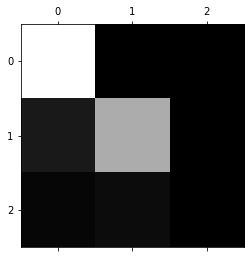

In [ ]:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [ ]:
probability = log_reg.predict_proba(X)
probability

array([[0.04611464, 0.90364242, 0.05024294],
       [0.66580944, 0.2938139 , 0.04037665],
       [0.05068621, 0.89851953, 0.05079425],
       [0.04311352, 0.90757615, 0.04931032],
       [0.94347364, 0.04589995, 0.01062641],
       [0.60350343, 0.35143969, 0.04505688],
       [0.95316018, 0.03764983, 0.00918999],
       [0.03778371, 0.91431538, 0.0479009 ],
       [0.05418225, 0.89409356, 0.05172419],
       [0.04451756, 0.90593259, 0.04954985],
       [0.05815654, 0.88853508, 0.05330837],
       [0.38825949, 0.55439305, 0.05734746],
       [0.3567332 , 0.58474443, 0.05852237],
       [0.04175175, 0.90917868, 0.04906958],
       [0.48740546, 0.46005048, 0.05254406],
       [0.87607485, 0.10436463, 0.01956052],
       [0.11812904, 0.82341047, 0.05846049],
       [0.91830779, 0.06749263, 0.01419958],
       [0.80041688, 0.171747  , 0.02783613],
       [0.91320655, 0.07191186, 0.01488159],
       [0.936016  , 0.05227482, 0.01170918],
       [0.72253098, 0.24194973, 0.03551929],
       [0.

In [ ]:
print(probability.shape[0])
print(X.shape[0])

74
74


In [ ]:
df2 = pd.DataFrame(log_reg.predict_proba(X), columns=log_reg.classes_)
df2.head()

,0,1,2
0,0.046115,0.903642,0.050243
1,0.665809,0.293814,0.040377
2,0.050686,0.898520,0.050794
3,0.043114,0.907576,0.049310
4,0.943474,0.045900,0.010626


In [ ]:
df2['predicted_class'] = y_pred
df2.head()

,0,1,2,predicted_class
0,0.046115,0.903642,0.050243,1
1,0.665809,0.293814,0.040377,0
2,0.050686,0.898520,0.050794,1
3,0.043114,0.907576,0.049310,1
4,0.943474,0.045900,0.010626,0


In [ ]:
concat_df = pd.concat([df, df2], axis=1)
concat_df

,State,Year,APC,PDP,Others,Latitude,Longitude,Winner,0,1,2,predicted_class
0,Abia,2015,0.030000,0.940000,0.020000,5.532003,7.486002,1,0.046115,0.903642,0.050243,1
1,Adamawa,2015,0.590000,0.400000,0.020000,10.270341,13.270032,0,0.665809,0.293814,0.040377,0
2,Akwa Ibom,2015,0.060000,0.940000,0.010000,5.007996,7.849999,1,0.050686,0.898520,0.050794,1
3,Anambra,2015,0.030000,0.960000,0.010000,6.210434,7.069997,1,0.043114,0.907576,0.049310,1
4,Bauchi,2015,0.910000,0.080000,0.000000,11.680410,10.190013,0,0.943474,0.045900,0.010626,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Rivers,2019,0.230000,0.740000,0.030000,4.810002,7.010001,1,0.158582,0.780814,0.060604,1
70,Sokoto,2019,0.560000,0.410000,0.020000,13.060015,5.240031,0,0.635558,0.321552,0.042890,0
71,Taraba,2019,0.460000,0.530000,0.010000,7.870410,9.780013,1,0.453871,0.491784,0.054344,1
72,Yobe,2019,0.890000,0.090000,0.020000,11.748996,11.966005,0,0.938070,0.050442,0.011488,0


In [ ]:
# Define the independent variables (X) and the dependent variable (y)
# Define the independent variables (X) and the dependent variable (y)
X = concat_df[['APC', 'PDP', 'Others']]
y = concat_df[['Winner']].values.ravel()
X= sm.add_constant(X)

model = LogisticRegression(multi_class='multinomial', solver= 'newton-cg')
result = model.fit(X,y)
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Other parameters: ', model.get_params())



Coefficients:  [[ 2.41970994e-07  2.03534763e+00 -2.01386477e+00 -2.12284801e-02]
 [-3.81240153e-08 -1.35061831e+00  1.49952039e+00 -1.58266722e-01]
 [-2.03846981e-07 -6.84729322e-01  5.14344375e-01  1.79495202e-01]]
Intercept:  [ 0.81205114  0.58909953 -1.40115067]
Other parameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Convert the 'Winner' column to the unit interval
concat_df['Winner'] = (concat_df['Winner'] - concat_df['Winner'].min()) / (concat_df['Winner'].max() - concat_df['Winner'].min())


In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X = concat_df[['APC', 'PDP', 'Others']]
y = concat_df[['Winner']]
X = sm.add_constant(X)

# model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# result = model.fit()

# Use statsmodels to show the summary of the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.355355
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                   74
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.1876
Time:                        21:18:38   Log-Likelihood:                -26.296
converged:                       True   LL-Null:                       -32.368
Covariance Type:            nonrobust   LLR p-value:                  0.006907
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.0538     57.338     -0.280      0.779    -128.435      96.327
APC           11.4127     57.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# from sklearn.linear_model import LogisticRegression

# # Define the independent variables (X) and the dependent variable (y)
# X = concat_df[['APC', 'PDP', 'Others']]
# y =  concat_df[['Winner']].values.ravel()
# X= sm.add_constant(X, prepend = False)

# mnlogit_mod = sm.MNLogit(y, X)
# mnlogit_fit = mnlogit_mod.fit()

# print (mnlogit_fit.summary())

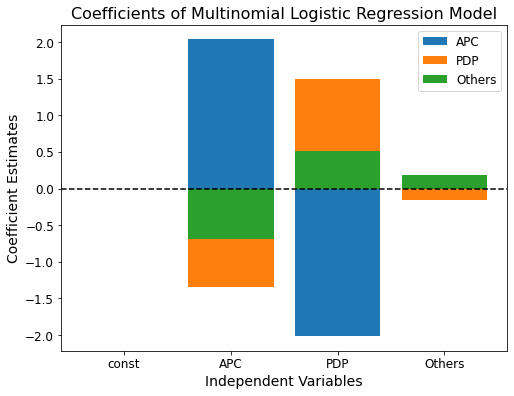

In [ ]:
# Extract the coefficients and intercepts from the model
coefs = model.coef_
intercepts = model.intercept_

# Define the possible values of the dependent variable
values = ['APC', 'PDP', 'Others']

# Plot a bar chart of the coefficients for each independent variable
plt.figure(figsize=(8,6))
for i, value in enumerate(values):
    plt.bar(X.columns, coefs[i], label=value)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Independent Variables', fontsize=14)
plt.ylabel('Coefficient Estimates', fontsize=14)
plt.title('Coefficients of Multinomial Logistic Regression Model', fontsize=16)
plt.legend(fontsize=12)
plt.show()





In [ ]:
!pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6)
nigeria_coords = [[4.272268, 2.676932], [13.885645, 14.677502]]
nigeria_map.fit_bounds(nigeria_coords)
for i, row in concat_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['State']).add_to(nigeria_map)

nigeria_map

# nigeria_map.save('nigeria_map.html')

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
df = pd.read_csv('/content/drive/MyDrive/Data from Electoral Analysis/Geo_data - Sheet1.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.crs = "EPSG:4326"
geojson_data = gdf.to_crs(epsg='4326').to_json()

In [ ]:
import json

with open('my_data.geojson', 'w') as f:
    json.dump(json.loads(geojson_data), f)

In [ ]:
df.head()

,Latitude,Longitude,geometry
0,5.532003,7.486002,POINT (7.48600 5.53200)
1,10.270341,13.270032,POINT (13.27003 10.27034)
2,5.007996,7.849999,POINT (7.85000 5.00800)
3,6.210434,7.069997,POINT (7.07000 6.21043)
4,11.680410,10.190013,POINT (10.19001 11.68041)


In [ ]:
geojson_data

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Latitude": 5.532003041, "Longitude": 7.486002487}, "geometry": {"type": "Point", "coordinates": [7.486002487, 5.532003041]}}, {"id": "1", "type": "Feature", "properties": {"Latitude": 10.2703408, "Longitude": 13.2700321}, "geometry": {"type": "Point", "coordinates": [13.2700321, 10.2703408]}}, {"id": "2", "type": "Feature", "properties": {"Latitude": 5.007996056, "Longitude": 7.849998524}, "geometry": {"type": "Point", "coordinates": [7.849998524, 5.007996056]}}, {"id": "3", "type": "Feature", "properties": {"Latitude": 6.210433572, "Longitude": 7.06999711}, "geometry": {"type": "Point", "coordinates": [7.06999711, 6.210433572]}}, {"id": "4", "type": "Feature", "properties": {"Latitude": 11.68040977, "Longitude": 10.19001339}, "geometry": {"type": "Point", "coordinates": [10.19001339, 11.68040977]}}, {"id": "5", "type": "Feature", "properties": {"Latitude": 7.190399596, "Longitude": 8.129984089},

In [ ]:
concat2_df = pd.concat([concat_df, df, df2], axis=1)
concat2_df.head()
# concat_df.head()

,State,Year,APC,PDP,Others,Latitude,Longitude,Winner,0,1,2,predicted_class,Latitude,Longitude,geometry,0,1,2,predicted_class
0,Abia,2015,0.030000,0.940000,0.020000,5.532003,7.486002,0.500000,0.046115,0.903642,0.050243,1,5.532003,7.486002,POINT (7.48600 5.53200),0.046115,0.903642,0.050243,1
1,Adamawa,2015,0.590000,0.400000,0.020000,10.270341,13.270032,0.000000,0.665809,0.293814,0.040377,0,10.270341,13.270032,POINT (13.27003 10.27034),0.665809,0.293814,0.040377,0
2,Akwa Ibom,2015,0.060000,0.940000,0.010000,5.007996,7.849999,0.500000,0.050686,0.898520,0.050794,1,5.007996,7.849999,POINT (7.85000 5.00800),0.050686,0.898520,0.050794,1
3,Anambra,2015,0.030000,0.960000,0.010000,6.210434,7.069997,0.500000,0.043114,0.907576,0.049310,1,6.210434,7.069997,POINT (7.07000 6.21043),0.043114,0.907576,0.049310,1
4,Bauchi,2015,0.910000,0.080000,0.000000,11.680410,10.190013,0.000000,0.943474,0.045900,0.010626,0,11.680410,10.190013,POINT (10.19001 11.68041),0.943474,0.045900,0.010626,0


In [ ]:
df_use = concat_df.drop(['Latitude',	'Longitude'], axis=1)
df_use.head()

,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
0,Abia,2015,0.030000,0.940000,0.020000,0.500000,0.046115,0.903642,0.050243,1
1,Adamawa,2015,0.590000,0.400000,0.020000,0.000000,0.665809,0.293814,0.040377,0
2,Akwa Ibom,2015,0.060000,0.940000,0.010000,0.500000,0.050686,0.898520,0.050794,1
3,Anambra,2015,0.030000,0.960000,0.010000,0.500000,0.043114,0.907576,0.049310,1
4,Bauchi,2015,0.910000,0.080000,0.000000,0.000000,0.943474,0.045900,0.010626,0


In [ ]:
# Load GeoJSON file for Nigeria's states boundaries
geojson_file = '/content/my_data.geojson'
geo_df = gpd.read_file(geojson_file)


In [ ]:
# Add state name as a new column to the GeoDataFrame
geo_df['State_Name'] = df_use['State']

# Convert GeoDataFrame to GeoJSON string with state name included as a property
geojson_data = geo_df.to_crs(epsg='4326').to_json()
geojson_data 

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": "0", "Latitude": 5.532003041, "Longitude": 7.486002487, "State_Name": "Abia"}, "geometry": {"type": "Point", "coordinates": [7.486002487, 5.532003041]}}, {"id": "1", "type": "Feature", "properties": {"id": "1", "Latitude": 10.2703408, "Longitude": 13.2700321, "State_Name": "Adamawa"}, "geometry": {"type": "Point", "coordinates": [13.2700321, 10.2703408]}}, {"id": "2", "type": "Feature", "properties": {"id": "2", "Latitude": 5.007996056, "Longitude": 7.849998524, "State_Name": "Akwa Ibom"}, "geometry": {"type": "Point", "coordinates": [7.849998524, 5.007996056]}}, {"id": "3", "type": "Feature", "properties": {"id": "3", "Latitude": 6.210433572, "Longitude": 7.06999711, "State_Name": "Anambra"}, "geometry": {"type": "Point", "coordinates": [7.06999711, 6.210433572]}}, {"id": "4", "type": "Feature", "properties": {"id": "4", "Latitude": 11.68040977, "Longitude": 10.19001339, "State_Name": "Bauc

In [ ]:
import json

with open('my_data.geojson1', 'w') as f:
    json.dump(json.loads(geojson_data), f)

In [ ]:
geo_df.head()

,id,Latitude,Longitude,geometry,State_Name
0,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia
1,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa
2,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom
3,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra
4,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi


In [ ]:
import geopandas as gpd
import pandas as pd
import folium


nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6)
nigeria_coords = [[4.272268, 2.676932], [13.885645, 14.677502]]
nigeria_map.fit_bounds(nigeria_coords)






# Merge the two DataFrames on the 'state' column
merged_df = pd.concat([geo_df, df_use], axis =1)

# Create choropleth map with folium
nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6)





folium.Choropleth(
    geo_data= merged_df,
    name='choropleth',
    data=merged_df,
    columns=['State', 'predicted_class'],
    key_on='feature.properties.State',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Predicted Class'
).add_to(nigeria_map)

folium.LayerControl().add_to(nigeria_map)

nigeria_map.save('nigeria_map.html')



In [ ]:
merged_df.shape

(74, 15)

In [ ]:
# merged_df.fillna(geo_df, inplace=True)
merged_df.dropna()

,id,Latitude,Longitude,geometry,State_Name,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
0,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia,Abia,2015,0.030000,0.940000,0.020000,0.500000,0.046115,0.903642,0.050243,1
1,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,Adamawa,2015,0.590000,0.400000,0.020000,0.000000,0.665809,0.293814,0.040377,0
2,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,Akwa Ibom,2015,0.060000,0.940000,0.010000,0.500000,0.050686,0.898520,0.050794,1
3,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra,Anambra,2015,0.030000,0.960000,0.010000,0.500000,0.043114,0.907576,0.049310,1
4,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi,Bauchi,2015,0.910000,0.080000,0.000000,0.000000,0.943474,0.045900,0.010626,0
5,5,7.190400,8.129984,POINT (8.12998 7.19040),Benue,Benue,2015,0.550000,0.440000,0.010000,0.000000,0.603503,0.351440,0.045057,0
6,6,10.620423,12.189995,POINT (12.18999 10.62042),Borno,Borno,2015,0.940000,0.050000,0.010000,0.000000,0.953160,0.037650,0.009190,0
7,7,4.664030,6.036987,POINT (6.03699 4.66403),Bayelsa,Bayelsa,2015,0.010000,0.980000,0.000000,0.500000,0.037784,0.914315,0.047901,1
8,8,4.960407,8.330024,POINT (8.33002 4.96041),Cross River,Cross River,2015,0.060000,0.920000,0.020000,0.500000,0.054182,0.894094,0.051724,1
9,9,5.890427,5.680004,POINT (5.68000 5.89043),Delta,Delta,2015,0.040000,0.960000,0.010000,0.500000,0.044518,0.905933,0.049550,1


In [ ]:
new_df = geo_df.copy()
new_df.shape

(37, 5)

In [ ]:
merged_df.to_csv('merged.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_merged= pd.read_csv('/content/drive/MyDrive/Data from Electoral Analysis/merged_1 - merged_1.csv')

In [ ]:
new_merged.tail()

,id,Latitude,Longitude,geometry,State_Name,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
69,69,4.810002,7.010001,POINT (7.010000772 4.810002257),Rivers,Rivers,2019,0.230000,0.740000,0.030000,0.500000,0.158582,0.780814,0.060604,1
70,70,13.060015,5.240031,POINT (5.240031289 13.06001548),Sokoto,Sokoto,2019,0.560000,0.410000,0.020000,0.000000,0.635558,0.321552,0.042890,0
71,71,7.870410,9.780013,POINT (9.780012572 7.870409769),Taraba,Taraba,2019,0.460000,0.530000,0.010000,0.500000,0.453871,0.491784,0.054344,1
72,72,11.748996,11.966005,POINT (11.96600457 11.74899608),Yobe,Yobe,2019,0.890000,0.090000,0.020000,0.000000,0.938070,0.050442,0.011488,0
73,73,12.170406,6.659996,POINT (6.659996296 12.1704057),Zamfara,Zamfara,2019,0.760000,0.220000,0.020000,0.000000,0.864992,0.114051,0.020957,0


In [ ]:
geojson_file = '/content/my_data.geojson'
new_geo = gpd.read_file(geojson_file)


In [ ]:
new_geo['State']= new_merged['State']

In [ ]:
new_geo_data = new_geo.to_crs(epsg='4326').to_json()
new_geo_data 

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": "0", "Latitude": 5.532003041, "Longitude": 7.486002487, "State": "Abia"}, "geometry": {"type": "Point", "coordinates": [7.486002487, 5.532003041]}}, {"id": "1", "type": "Feature", "properties": {"id": "1", "Latitude": 10.2703408, "Longitude": 13.2700321, "State": "Adamawa"}, "geometry": {"type": "Point", "coordinates": [13.2700321, 10.2703408]}}, {"id": "2", "type": "Feature", "properties": {"id": "2", "Latitude": 5.007996056, "Longitude": 7.849998524, "State": "Akwa Ibom"}, "geometry": {"type": "Point", "coordinates": [7.849998524, 5.007996056]}}, {"id": "3", "type": "Feature", "properties": {"id": "3", "Latitude": 6.210433572, "Longitude": 7.06999711, "State": "Anambra"}, "geometry": {"type": "Point", "coordinates": [7.06999711, 6.210433572]}}, {"id": "4", "type": "Feature", "properties": {"id": "4", "Latitude": 11.68040977, "Longitude": 10.19001339, "State": "Bauchi"}, "geometry": {"type"

In [ ]:
import json

with open('geodata.geojson1', 'w') as f:
    json.dump(json.loads(new_geo_data), f)

In [ ]:
new_geo.head()

,id,Latitude,Longitude,geometry,State
0,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia
1,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa
2,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom
3,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra
4,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi


In [ ]:
merged_df.isnull().sum()

id                 37
Latitude           37
Longitude          37
geometry           37
State_Name         37
State               0
Year                0
APC                 0
PDP                 0
Others              0
Winner              0
0                   0
1                   0
2                   0
predicted_class     0
dtype: int64

In [ ]:
# merge the new geo_data with the old one to have 74 rows

merge_df = pd.concat([geo_df, new_geo], ignore_index=True)

In [ ]:
merge_df.tail()

,id,Latitude,Longitude,geometry,State_Name,State
69,32,4.810002,7.010001,POINT (7.01000 4.81000),NaN,Rivers
70,33,13.060015,5.240031,POINT (5.24003 13.06002),NaN,Sokoto
71,34,7.870410,9.780013,POINT (9.78001 7.87041),NaN,Taraba
72,35,11.748996,11.966005,POINT (11.96600 11.74900),NaN,Yobe
73,36,12.170406,6.659996,POINT (6.66000 12.17041),NaN,Zamfara


In [ ]:
# replace null values in States column with the State_Name column

merge_df['State']= merged_df['State_Name'].fillna(merge_df['State'])

In [ ]:
merge_df.head()

,id,Latitude,Longitude,geometry,State_Name,State
0,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia,Abia
1,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,Adamawa
2,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,Akwa Ibom
3,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra,Anambra
4,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi,Bauchi


In [ ]:
merge_df.tail()

,id,Latitude,Longitude,geometry,State_Name,State
69,32,4.810002,7.010001,POINT (7.01000 4.81000),NaN,Rivers
70,33,13.060015,5.240031,POINT (5.24003 13.06002),NaN,Sokoto
71,34,7.870410,9.780013,POINT (9.78001 7.87041),NaN,Taraba
72,35,11.748996,11.966005,POINT (11.96600 11.74900),NaN,Yobe
73,36,12.170406,6.659996,POINT (6.66000 12.17041),NaN,Zamfara


In [ ]:
# drop State_Name Column
merge_df.drop('State_Name', axis=1,inplace=True)


In [ ]:
merge_df.isnull().sum()

id           0
Latitude     0
Longitude    0
geometry     0
State        0
dtype: int64

In [ ]:
print(merge_df.crs)

EPSG:4326


In [ ]:
merge.tail(10)

,id,Latitude,Longitude,geometry,State
64,27,7.160427,3.350017,POINT (3.35002 7.16043),Ogun
65,28,7.250396,5.199982,POINT (5.19998 7.25040),Ondo
66,29,7.629959,4.179993,POINT (4.17999 7.62996),Osun
67,30,7.970016,3.590003,POINT (3.59000 7.97002),Oyo
68,31,9.929974,8.890041,POINT (8.89004 9.92997),Plateau
69,32,4.810002,7.010001,POINT (7.01000 4.81000),Rivers
70,33,13.060015,5.240031,POINT (5.24003 13.06002),Sokoto
71,34,7.870410,9.780013,POINT (9.78001 7.87041),Taraba
72,35,11.748996,11.966005,POINT (11.96600 11.74900),Yobe
73,36,12.170406,6.659996,POINT (6.66000 12.17041),Zamfara


In [ ]:
df_use.tail(10)

,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
64,Ogun,2019,0.500000,0.350000,0.150000,0.000000,0.639676,0.315502,0.044822,0
65,Ondo,2019,0.430000,0.500000,0.070000,0.500000,0.456111,0.488296,0.055593,1
66,Osun,2019,0.490000,0.470000,0.040000,0.000000,0.530514,0.418879,0.050607,0
67,Oyo,2019,0.440000,0.440000,0.120000,1.000000,0.516678,0.430132,0.053191,0
68,Plateau,2019,0.450000,0.530000,0.020000,0.500000,0.445911,0.499115,0.054973,1
69,Rivers,2019,0.230000,0.740000,0.030000,0.500000,0.158582,0.780814,0.060604,1
70,Sokoto,2019,0.560000,0.410000,0.020000,0.000000,0.635558,0.321552,0.042890,0
71,Taraba,2019,0.460000,0.530000,0.010000,0.500000,0.453871,0.491784,0.054344,1
72,Yobe,2019,0.890000,0.090000,0.020000,0.000000,0.938070,0.050442,0.011488,0
73,Zamfara,2019,0.760000,0.220000,0.020000,0.000000,0.864992,0.114051,0.020957,0


In [ ]:
df_use.head(10)

,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
0,Abia,2015,0.030000,0.940000,0.020000,0.500000,0.046115,0.903642,0.050243,1
1,Adamawa,2015,0.590000,0.400000,0.020000,0.000000,0.665809,0.293814,0.040377,0
2,Akwa Ibom,2015,0.060000,0.940000,0.010000,0.500000,0.050686,0.898520,0.050794,1
3,Anambra,2015,0.030000,0.960000,0.010000,0.500000,0.043114,0.907576,0.049310,1
4,Bauchi,2015,0.910000,0.080000,0.000000,0.000000,0.943474,0.045900,0.010626,0
5,Benue,2015,0.550000,0.440000,0.010000,0.000000,0.603503,0.351440,0.045057,0
6,Borno,2015,0.940000,0.050000,0.010000,0.000000,0.953160,0.037650,0.009190,0
7,Bayelsa,2015,0.010000,0.980000,0.000000,0.500000,0.037784,0.914315,0.047901,1
8,Cross River,2015,0.060000,0.920000,0.020000,0.500000,0.054182,0.894094,0.051724,1
9,Delta,2015,0.040000,0.960000,0.010000,0.500000,0.044518,0.905933,0.049550,1


In [ ]:
# concate the new geo data 'merge' with the main dataframe
update_merge = pd.merge(merge_df, df_use)


In [ ]:
update_merge.drop_duplicates(inplace=True)

In [ ]:
update_merge.shape

(74, 14)

In [ ]:
update_merge[1:]

,id,Latitude,Longitude,geometry,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
1,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia,2019,0.260000,0.680000,0.060000,0.500000,0.204399,0.733368,0.062233,1
4,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,2015,0.590000,0.400000,0.020000,0.000000,0.665809,0.293814,0.040377,0
5,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,2019,0.470000,0.510000,0.030000,0.500000,0.479632,0.467023,0.053345,0
8,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,2015,0.060000,0.940000,0.010000,0.500000,0.050686,0.898520,0.050794,1
9,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,2019,0.300000,0.680000,0.010000,0.500000,0.225971,0.712937,0.061092,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,34,7.870410,9.780013,POINT (9.78001 7.87041),Taraba,2019,0.460000,0.530000,0.010000,0.500000,0.453871,0.491784,0.054344,1
140,35,11.748996,11.966005,POINT (11.96600 11.74900),Yobe,2015,0.940000,0.050000,0.000000,0.000000,0.953129,0.037700,0.009171,0
141,35,11.748996,11.966005,POINT (11.96600 11.74900),Yobe,2019,0.890000,0.090000,0.020000,0.000000,0.938070,0.050442,0.011488,0
144,36,12.170406,6.659996,POINT (6.66000 12.17041),Zamfara,2015,0.800000,0.190000,0.010000,0.000000,0.889778,0.092335,0.017887,0


In [ ]:
update_merge.head(37)

,id,Latitude,Longitude,geometry,State,Year,APC,PDP,Others,Winner,0,1,2,predicted_class
0,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia,2015,0.030000,0.940000,0.020000,0.500000,0.046115,0.903642,0.050243,1
1,0,5.532003,7.486002,POINT (7.48600 5.53200),Abia,2019,0.260000,0.680000,0.060000,0.500000,0.204399,0.733368,0.062233,1
4,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,2015,0.590000,0.400000,0.020000,0.000000,0.665809,0.293814,0.040377,0
5,1,10.270341,13.270032,POINT (13.27003 10.27034),Adamawa,2019,0.470000,0.510000,0.030000,0.500000,0.479632,0.467023,0.053345,0
8,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,2015,0.060000,0.940000,0.010000,0.500000,0.050686,0.898520,0.050794,1
9,2,5.007996,7.849999,POINT (7.85000 5.00800),Akwa Ibom,2019,0.300000,0.680000,0.010000,0.500000,0.225971,0.712937,0.061092,1
12,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra,2015,0.030000,0.960000,0.010000,0.500000,0.043114,0.907576,0.049310,1
13,3,6.210434,7.069997,POINT (7.07000 6.21043),Anambra,2019,0.060000,0.870000,0.080000,1.000000,0.064180,0.881174,0.054647,1
16,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi,2015,0.910000,0.080000,0.000000,0.000000,0.943474,0.045900,0.010626,0
17,4,11.680410,10.190013,POINT (10.19001 11.68041),Bauchi,2019,0.780000,0.200000,0.020000,0.000000,0.879762,0.101047,0.019191,0


In [ ]:
update_merge.isnull().sum()

id                 0
Latitude           0
Longitude          0
geometry           0
State              0
Year               0
APC                0
PDP                0
Others             0
Winner             0
0                  0
1                  0
2                  0
predicted_class    0
dtype: int64

In [ ]:

# Define custom colors for each class
color_dict = {
    0: 'green',
    1: 'blue',
    2: 'red'
}


# Convert predicted_class column to string type
merged_df['predicted_class'] = update_merge['predicted_class'].astype(int)

# Create step colormap based on predicted_class values
colormap = folium.StepColormap(
    colors=[color_dict[k] for k in color_dict.keys()],
    index=[k for k in color_dict.keys()],
    vmin=int(update_merge['predicted_class'].min()),
    vmax=int(update_merge['predicted_class'].max())
)

# Add step colormap to map
colormap.add_to(nigeria_map)

# Add geojson layer with predicted_class values and step colormap
folium.GeoJson(
    update_merge,
    name='choropleth',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['predicted_class']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['State', 'predicted_class'],
        aliases=['State:', 'Predicted Class:'],
        sticky=True
    )
).add_to(nigeria_map)

folium.LayerControl().add_to(nigeria_map)

nigeria_map.save('nigeria_map.html')



In [ ]:
nigeria_map

In [ ]:
colormap.caption = 'Predicted Class'
nigeria_map.add_child(colormap)


ValueError: ignored

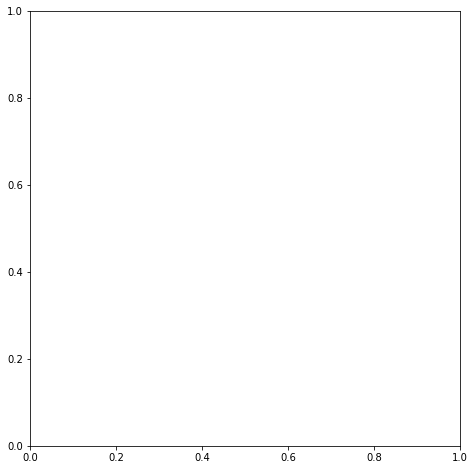

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

import geopandas as gpd
import matplotlib.pyplot as plt

# # Read the GeoJSON file as a geopandas dataframe
# merged_df = gpd.read_file('merged_data.geojson')

# Define the colors for each class
color_dict = {
    0: 'BrBG',
    1: 'BrBG_r',
    2: 'BuGn'
}

# Create the choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
update_merge.plot(column='predicted_class', cmap=color_dict, linewidth=0.8, ax=ax, edgecolor='black')

# Add a title and legend
ax.set_title('Predicted Classes')
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0.5))

# Save the plot
plt.savefig('predicted_classes_map.png', dpi=300)


